In [ ]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import layers

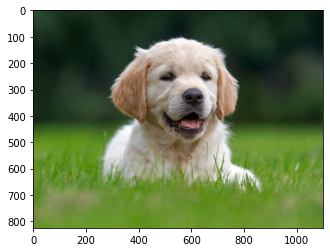

In [ ]:
image = plt.imread("/content/dog.jpg")
image_size = 72
plt.imshow(image)

In [ ]:
resized_image = tf.image.resize(tf.convert_to_tensor([image]), size=(image_size, image_size))
print(resized_image.shape)
patches  = tf.image.extract_patches(resized_image, [1,6,6,1], [1,6,6,1], [1,1,1,1], padding='VALID')
print(patches.shape)
patch_dims = patches.shape[-1]
print(patch_dims)
patches = tf.reshape(patches, [1, -1, patch_dims])
patches.shape

(1, 72, 72, 3)
(1, 12, 12, 108)
108


TensorShape([1, 144, 108])

In [ ]:
n = int(np.sqrt(patches.shape[1]))
n

12

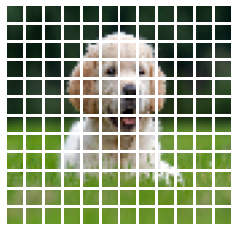

In [ ]:
n = int(np.sqrt(patches.shape[1]))
plt.figure(figsize=(4, 4))
for i, patch in enumerate(patches[0]):
    ax = plt.subplot(n, n, i + 1)
    patch_img = tf.reshape(patch, (6, 6, 3))
    plt.imshow(patch_img.numpy().astype("uint8"))
    plt.axis("off")